### Easy

1. How many unique customers are in the dataset?

In [92]:
import pandas as pd

df = pd.read_csv('fct_invoice.csv')

unique_customers = df['customer_id'].nunique()
print("Number of unique customers:", unique_customers)

Number of unique customers: 5191


2. What are the different categories of products available? How many unique categories are there?

In [95]:
category_counts = df['category'].value_counts()

num_categories = len(category_counts)
print("Number of different categories:", num_categories)

unique_categories = df['category'].unique()

print("Different categories of products:")
for category in unique_categories:
    print(category)

Number of different categories: 8
Different categories of products:
Clothing
Shoes
Books
Cosmetics
Food & Beverage
Toys
Technology
Souvenir


3. Which payment method is the most popular? How many times was it used?

In [106]:
payment = df['payment_method'].value_counts().head(1)

print("Most popular payment method:", list(payment.index))
print("Times used:", payment.values)

Most popular payment method: ['Cash']
Times used: [44447]


### Medium

1. What are the three most popular categories, by total sales?

In [40]:
import pandas as pd


df = pd.read_csv("fct_invoice.csv")

# Group the data by "category" and calculate the sum of sales for each category
category_sales = df.groupby("category")["price"].sum()

# Sort the categories based on their total sales in descending order
sorted_categories = category_sales.sort_values(ascending=False)

# Get the top 3 categories with the most total sales
top_3_categories = sorted_categories.head(3)

print("Three most popular categories by sales:", list(top_3_categories.index))

Three most popular categories by sales: ['Clothing', 'Shoes', 'Technology']


2. What are the total sales attributed to customers over the age of 45?

In [114]:
import pandas as pd

csv = pd.read_csv("fct_invoice.csv")
json = pd.read_json("dim_customer.json")

json.rename(columns={"id":"customer_id"})
merged = pd.merge(csv,json,left_on="customer_id",right_on="id")
merged['total'] = merged['quantity'] * merged['price']
age_above_45 = merged[merged['age'] > 45]
age_above_45['total']

print("Total sales attributed to customers over the age of 45:", sum(age_above_45['total']))

Total sales attributed to customers over the age of 45: 82039768.14999601


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

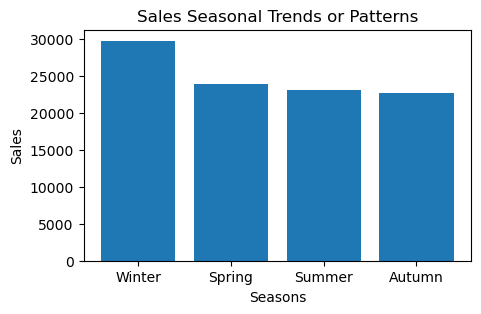

In [122]:
import numpy as np

df['invoice_date'] = pd.DatetimeIndex(df['invoice_date'], dayfirst = True)
df['month'] = pd.DatetimeIndex(df['invoice_date']).month

conditions = [
    (df['month'].isin([12, 1, 2])),
    (df['month'].isin([3, 4, 5])),
    (df['month'].isin([6, 7, 8])),
    (df['month'].isin([9, 10, 11]))
]

seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

df['season'] = np.select(conditions, seasons)

sales = list(df['season'].value_counts())

plt.figure(figsize=(5,3))
plt.bar(seasons,sales)

plt.xlabel('Seasons')
plt.ylabel('Sales')
plt.title('Sales Seasonal Trends or Patterns')

plt.show()

Most sales are within the winter season, most likely because of Christmas.

## Hard 

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [74]:
decades = pd.cut(merged['age'],bins=range(10, 101, 10),right=False)
merged.pivot_table(index="category",columns=decades,values="quantity",aggfunc="sum")

age,"[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)"
category,,,,,,,,,
Books,229,1427,1518,1542,1364,1420,1019,500,0
Clothing,1727,9392,10247,10220,9343,9700,7055,4095,0
Cosmetics,730,4060,4871,4460,3958,4344,2807,1752,0
Food & Beverage,697,3906,4540,4677,3824,4243,2862,1637,0
Shoes,457,2716,3186,3148,2652,2696,2017,1180,0
Souvenir,281,1304,1496,1514,1286,1307,903,558,0
Technology,274,1359,1590,1553,1162,1457,931,522,0
Toys,480,2859,3217,2983,2626,2797,2078,1201,0
